# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Here are the observations regarding missing values and data types that may need to be addressed 'unknown' represents missing data. It can be treated as a separate category or imputed based on the distribution of the other categories.

### Regarding coercion of data types, the categorical variables may be represented as type 'object' in the DataFrame. For our pursposes, it may be helpful to convert these into a numeric format. This can be accomplished using one-hot encoding or label encoding. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### The business objective in this context typically revolves around improving the effectiveness of marketing campaigns by the bank. Given the data provided, which includes various details about clients and their response to previous marketing campaigns, the likely objective would be:

### To increase the conversion rate of the bank's marketing campaigns by identifying the profile of clients who are more likely to subscribe to a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
import pandas as pd
import numpy as np


# Encode categorical variables using one-hot encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Handle 'unknown' values by treating 'unknown' as a separate category
# One-hot encoding as done above will automatically handle 'unknown' values

# Adding the numeric feature 'age' to the encoded features
df_encoded['age'] = df['age']

# Encode the target variable 'y'. 
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})



In [7]:
df_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,56,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,57,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,37,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,56,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the target column 'y' from df_encoded
X = df_encoded.drop('y', axis=1)

# Define target (y) as the column 'y' from df_encoded
y = df_encoded['y']

# Split the data into training and testing sets
# test_size=0.2 indicates that 20% of the data will be used for the test set, and 80% for the training set
# random_state is set to a fixed number to ensure reproducibility of the exact split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that always predicts the most frequent class (majority class)
dummy_clf = DummyClassifier(strategy='most_frequent')

# "Train" the dummy classifier - this is just to fit the strategy of the dummy classifier to the training data
dummy_clf.fit(X_train, y_train)

# Calculate the baseline accuracy - the score is the accuracy in this case
baseline_accuracy = dummy_clf.score(X_test, y_test)

print(f"The baseline accuracy to beat is: {baseline_accuracy:.2f}")

The baseline accuracy to beat is: 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
# solver='lbfgs' is a good default choice for small datasets
# max_iter may need to be increased if the algorithm does not converge
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the training set and the test set
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate the accuracy on the training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print out the accuracy scores
print(f"Training set accuracy: {train_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Training set accuracy: 0.89
Test set accuracy: 0.89


### Problem 9: Score the Model

What is the accuracy of your model?

Training set accuracy: 0.89
Test set accuracy: 0.89

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
import pandas as pd
import numpy as np

# Initialize the models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Iterate over the models to train and score each one
for name, model in models.items():
    # Record the start time
    start_time = time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Record the end time and calculate the training time
    end_time = time()
    train_time = end_time - start_time
    
    # Predict the labels for the training set and the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate the accuracy on the training set and test set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the results to the DataFrame
    results = results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)

# Display the results DataFrame
results.sort_values(by='Test Accuracy', ascending=False)

/var/folders/z8/d6jck7qn0qbfcwl4f9hk82r00000gn/T/ipykernel_81829/4126564128.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/z8/d6jck7qn0qbfcwl4f9hk82r00000gn/T/ipykernel_81829/4126564128.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/z8/d6jck7qn0qbfcwl4f9hk82r00000gn/T/ipykernel_81829/4126564128.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/z8/d6jck7qn0qbfcwl4f9hk82r00000gn/T/ipykernel_81829/4126564128.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.466610,0.887557,0.886502
3,SVM,17.307635,0.887557,0.886502
1,KNN,0.008583,0.892625,0.876184
2,Decision Tree,0.092724,0.916601,0.861131


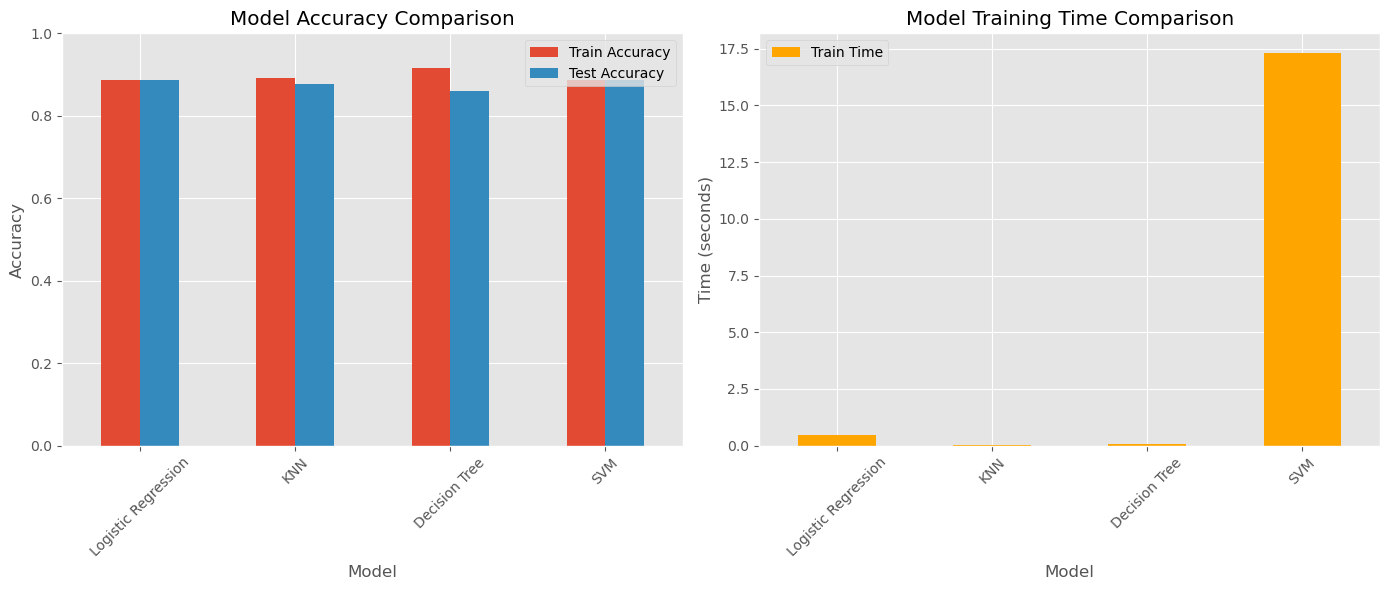

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is the DataFrame from the previous step
# which contains the model names, training times, train accuracies, and test accuracies

# Set the style
plt.style.use('ggplot')

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot training and test accuracy
accuracy = results[['Model', 'Train Accuracy', 'Test Accuracy']].set_index('Model')
accuracy.plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1.0)  # Assuming accuracy is between 0 and 1

# Plot training time
times = results[['Model', 'Train Time']].set_index('Model')
times.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Model Training Time Comparison')
axes[1].set_ylabel('Time (seconds)')

# Set the x-axis labels to be more readable
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Show a legend on only the first plot (it's not necessary on the second one)
axes[0].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# More Feature Engineering and Exploration

## Gender Feature:
### If the gender feature does not contribute to the predictive power of the model, it may be beneficial to remove it. However, in this case, it may introduce bias or violate fairness considerations. In some cases, intentionally excluding such attributes is necessary to prevent discriminatory predictions.



## Hyperparameter Tuning and Grid Search
### Hyperparameter tuning involves finding the combination of hyperparameters that results in the best model performance. For the models discussed:

#### KNN:

1/ Number of Neighbors (n_neighbors): The number of neighbors to consider. Typically, larger numbers reduce the effects of noise but make the boundaries between classes less distinct.


### Decision Tree:

1/ Maximum Depth (max_depth): Controls the depth of the tree. Deeper trees can model more complex patterns but may lead to overfitting.
2/ Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node.
3/ Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node.

### SVM:

1/ Kernel: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'poly', 'rbf', 'sigmoid').

### Using tools like GridSearchCV or RandomizedSearchCV, one can systematically explore a range of hyperparameters to find the best performer.

# Adjust Your Performance Metric
### The choice of performance metric is critical and should reflect the business problem we're are trying to solve. Common metrics include:

#### Accuracy: Useful when the classes are balanced, but can be misleading when class imbalances exist.

#### Precision and Recall: Important when the costs of false positives and false negatives are very different.

#### F1 Score: The harmonic mean of precision and recall, useful when you need a balance between precision and recall and there is an uneven class distribution.

#### ROC-AUC: A plot of the true positive rate against the false positive rate. This metric is useful for evaluating classifiers at various threshold settings.

#### Confusion Matrix: Provides a detailed breakdown of the correct and incorrect classifications for each class.

##### Questions